In [22]:
filename = "yellow_tripdata_2025-11.paraquet"
df = pd.read_parquet(filename)
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,7,2025-11-01 00:13:25,2025-11-01 00:13:25,1.0,1.68,1.0,N,43,186,1,14.9,0.00,0.5,1.50,0.00,1.0,22.15,2.5,0.00,0.75
1,2,2025-11-01 00:49:07,2025-11-01 01:01:22,1.0,2.28,1.0,N,142,237,1,14.2,1.00,0.5,4.99,0.00,1.0,24.94,2.5,0.00,0.75
2,1,2025-11-01 00:07:19,2025-11-01 00:20:41,0.0,2.70,1.0,N,163,238,1,15.6,4.25,0.5,4.27,0.00,1.0,25.62,2.5,0.00,0.75
3,2,2025-11-01 00:00:00,2025-11-01 01:01:03,3.0,12.87,1.0,N,138,261,1,66.7,6.00,0.5,0.00,6.94,1.0,86.14,2.5,1.75,0.75
4,1,2025-11-01 00:18:50,2025-11-01 00:49:32,0.0,8.40,1.0,N,138,37,2,39.4,7.75,0.5,0.00,0.00,1.0,48.65,0.0,1.75,0.00


In [23]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()


In [24]:
df['trip_duration_min'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
).dt.total_seconds() / 60


In [25]:
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']


In [26]:
df = df[
    (df['trip_distance'] > 0) &
    (df['fare_amount'] > 0) &
    (df['trip_duration_min'] > 0) &
    (df['trip_duration_min'] < 300)
]


In [27]:
df[['trip_distance', 'trip_duration_min', 'fare_amount', 'fare_per_mile']].describe()


,trip_distance,trip_duration_min,fare_amount,fare_per_mile
count,3.642421e+06,3.642421e+06,3.642421e+06,3.642421e+06
mean,5.922725e+00,1.833581e+01,1.956383e+01,1.644873e+01
std,5.571518e+02,1.487518e+01,1.774236e+01,1.921030e+02
min,1.000000e-02,1.666667e-02,1.000000e-02,4.267016e-07
25%,1.090000e+00,8.716667e+00,9.300000e+00,5.399061e+00
50%,1.880000e+00,1.440000e+01,1.420000e+01,7.346939e+00
75%,3.760000e+00,2.300000e+01,2.330000e+01,9.705882e+00
max,2.316037e+05,2.990833e+02,1.508700e+03,6.000000e+04


In [28]:
df.groupby('payment_type')['tip_amount'].mean()


payment_type
0    0.439937
1    4.292967
2    0.000232
3    0.000474
4    0.000103
Name: tip_amount, dtype: float64

In [29]:
df.groupby('pickup_hour')['total_amount'].mean()


pickup_hour
0     27.793563
1     25.638625
2     24.178592
3     24.317078
4     29.191509
5     33.269415
6     30.079562
7     26.839645
8     26.436795
9     26.831204
10    27.296165
11    27.345268
12    28.020994
13    28.844695
14    29.789478
15    29.649798
16    31.805668
17    29.994578
18    28.712607
19    28.747122
20    27.923042
21    27.775614
22    28.338021
23    28.551119
Name: total_amount, dtype: float64

In [32]:
trips_by_hour = df['pickup_hour'].value_counts().sort_index()
trips_by_hour



pickup_hour
0     107964
1      75523
2      47945
3      34363
4      29911
5      29707
6      56655
7     104487
8     137051
9     151959
10    166312
11    180365
12    196236
13    205107
14    218521
15    229097
16    223858
17    238035
18    242682
19    218252
20    206403
21    209136
22    189544
23    143308
Name: count, dtype: int64

In [33]:
%pip install matplotlib


     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/52.8 kB ? eta 


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



   --------------------- ------------------ 1.2/2.3 MB 103.6 kB/s eta 0:00:11
   --------------------- ------------------ 1.2/2.3 MB 103.6 kB/s eta 0:00:11
   --------------------- ------------------ 1.2/2.3 MB 103.6 kB/s eta 0:00:11
   --------------------- ------------------ 1.2/2.3 MB 103.6 kB/s eta 0:00:11
   --------------------- ------------------ 1.3/2.3 MB 103.6 kB/s eta 0:00:11
   --------------------- ------------------ 1.3/2.3 MB 103.6 kB/s eta 0:00:11
   --------------------- ------------------ 1.3/2.3 MB 103.6 kB/s eta 0:00:11
   --------------------- ------------------ 1.3/2.3 MB 103.6 kB/s eta 0:00:11
   --------------------- ------------------ 1.3/2.3 MB 103.6 kB/s eta 0:00:11
   --------------------- ------------------ 1.3/2.3 MB 102.3 kB/s eta 0:00:11
   --------------------- ------------------ 1.3/2.3 MB 102.3 kB/s eta 0:00:11
   ---------------------- ----------------- 1.3/2.3 MB 103.3 kB/s eta 0:00:11
   ---------------------- ----------------- 1.3/2.3 MB 103.3 kB

In [36]:
# Combine average fare and average tip into one table
hourly_summary = df.groupby('pickup_hour')[['fare_amount', 'tip_amount']].mean()
hourly_summary = hourly_summary.rename(columns={'fare_amount': 'avg_fare', 'tip_amount': 'avg_tip'})

hourly_summary


,avg_fare,avg_tip
pickup_hour,,
0,19.140972,2.773094
1,17.422318,2.473946
2,16.353520,2.223267
3,16.736381,2.066269
4,21.369126,2.204870
5,25.001135,2.554084
6,22.514031,2.466354
7,19.334127,2.529022
8,18.778047,2.674341


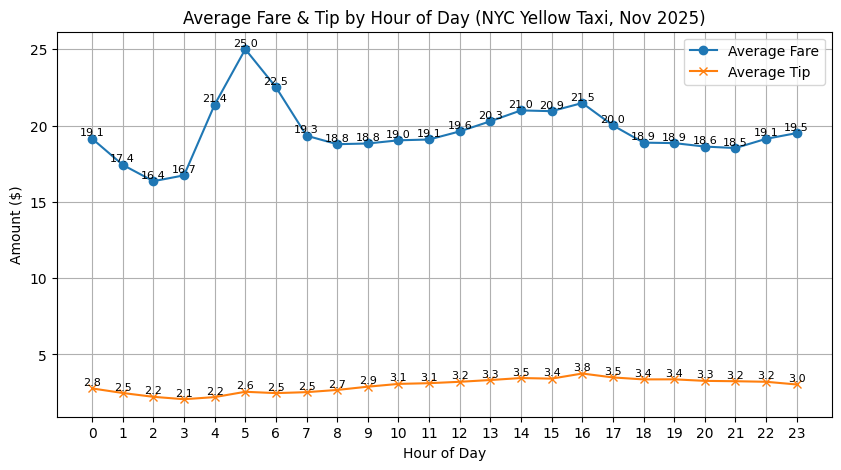

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(hourly_summary.index, hourly_summary['avg_fare'], marker='o', label='Average Fare')
plt.plot(hourly_summary.index, hourly_summary['avg_tip'], marker='x', label='Average Tip')

# Add data labels for each hour
for x, y in zip(hourly_summary.index, hourly_summary['avg_fare']):
    plt.text(x, y+0.2, f'{y:.1f}', ha='center', fontsize=8)

for x, y in zip(hourly_summary.index, hourly_summary['avg_tip']):
    plt.text(x, y+0.2, f'{y:.1f}', ha='center', fontsize=8)

plt.title("Average Fare & Tip by Hour of Day (NYC Yellow Taxi, Nov 2025)")
plt.xlabel("Hour of Day")
plt.ylabel("Amount ($)")
plt.xticks(range(0,24))
plt.grid(True)
plt.legend()
plt.show()


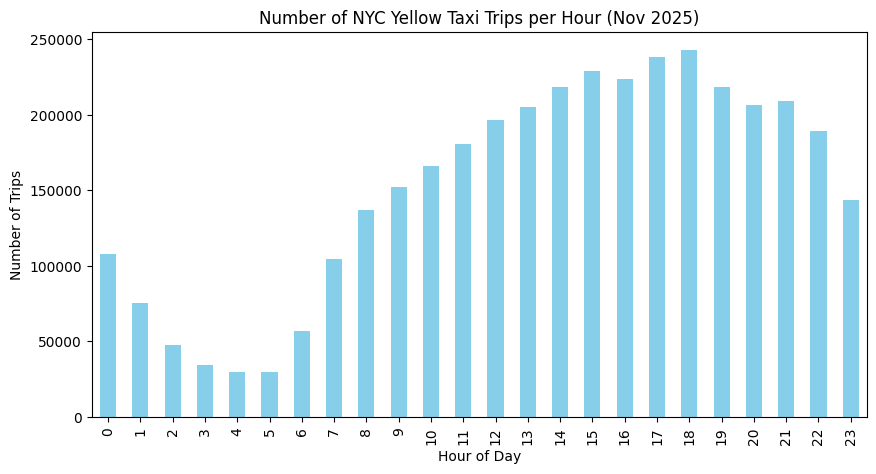

In [38]:
import matplotlib.pyplot as plt

trips_by_hour.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Number of NYC Yellow Taxi Trips per Hour (Nov 2025)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()


In [41]:
avg_by_hour = df.groupby('pickup_hour')[['fare_amount', 'tip_amount']].mean()
avg_by_hour = avg_by_hour.rename(columns={'fare_amount':'avg_fare', 'tip_amount':'avg_tip'})
avg_by_hour





,avg_fare,avg_tip
pickup_hour,,
0,19.140972,2.773094
1,17.422318,2.473946
2,16.353520,2.223267
3,16.736381,2.066269
4,21.369126,2.204870
5,25.001135,2.554084
6,22.514031,2.466354
7,19.334127,2.529022
8,18.778047,2.674341


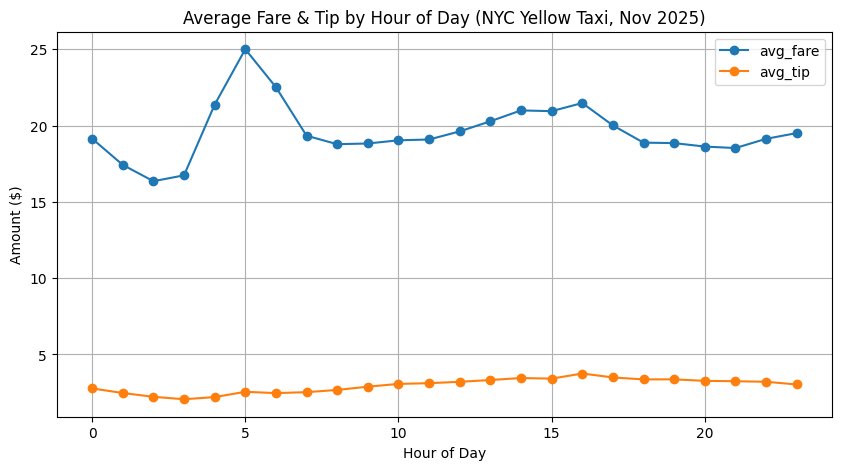

In [42]:
import matplotlib.pyplot as plt

avg_by_hour.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Average Fare & Tip by Hour of Day (NYC Yellow Taxi, Nov 2025)")
plt.xlabel("Hour of Day")
plt.ylabel("Amount ($)")
plt.grid(True)
plt.show()


In [43]:
# Trip duration (minutes)
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Summary stats for distance and duration
df[['trip_distance', 'trip_duration_min']].describe()


,trip_distance,trip_duration_min
count,3.642421e+06,3.642421e+06
mean,5.922725e+00,1.833581e+01
std,5.571518e+02,1.487518e+01
min,1.000000e-02,1.666667e-02
25%,1.090000e+00,8.716667e+00
50%,1.880000e+00,1.440000e+01
75%,3.760000e+00,2.300000e+01
max,2.316037e+05,2.990833e+02


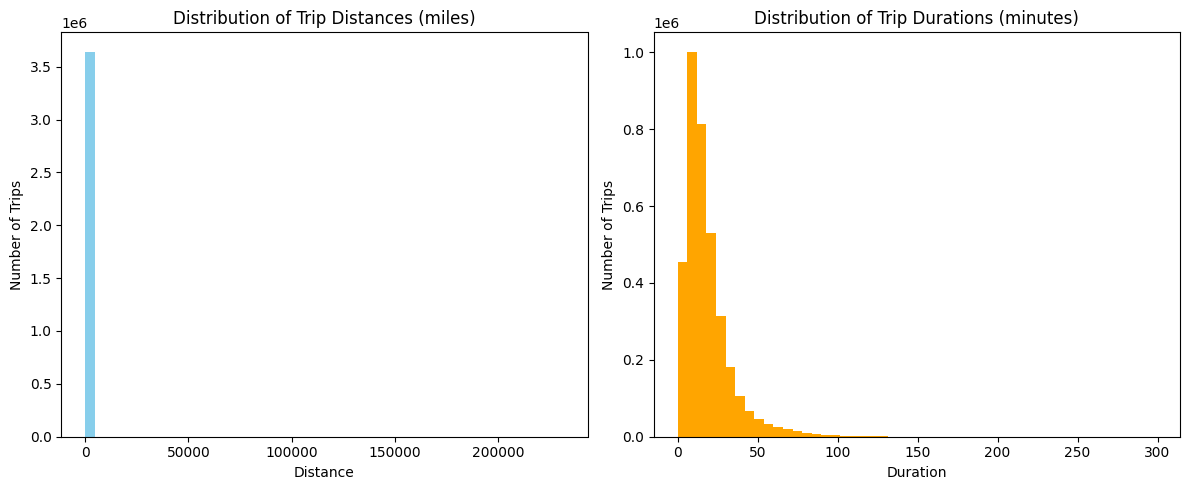

In [44]:
plt.figure(figsize=(12,5))

# Trip distance histogram
plt.subplot(1,2,1)
df['trip_distance'].plot(kind='hist', bins=50, color='skyblue')
plt.title("Distribution of Trip Distances (miles)")
plt.xlabel("Distance")
plt.ylabel("Number of Trips")

# Trip duration histogram
plt.subplot(1,2,2)
df['trip_duration_min'].plot(kind='hist', bins=50, color='orange')
plt.title("Distribution of Trip Durations (minutes)")
plt.xlabel("Duration")
plt.ylabel("Number of Trips")

plt.tight_layout()
plt.show()


In [48]:
# Count payment types
payment_map = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided"
}

df['payment_method'] = df['payment_type'].map(payment_map)

payment_summary = (
    df['payment_method']
    .value_counts()
    .to_frame('trip_count')
)

payment_summary['percentage'] = (
    payment_summary['trip_count'] / len(df) * 100
).round(2)

payment_summary





,trip_count,percentage
payment_method,,
Credit Card,2628032,72.15
Cash,346601,9.52
Dispute,33257,0.91
No Charge,11121,0.31


In [49]:
payment_behavior = (
    df.groupby('payment_method')
    .agg(
        total_trips=('payment_method', 'count'),
        avg_fare=('fare_amount', 'mean'),
        avg_tip=('tip_amount', 'mean'),
        avg_total_amount=('total_amount', 'mean')
    )
    .round(2)
)

payment_behavior


,total_trips,avg_fare,avg_tip,avg_total_amount
payment_method,,,,
Cash,346601,19.89,0.00,25.54
Credit Card,2628032,20.22,4.29,30.43
Dispute,33257,24.25,0.00,30.41
No Charge,11121,20.60,0.00,26.42


In [50]:
tip_share = (
    df.groupby('payment_method')['tip_amount']
    .sum()
    .to_frame('total_tips')
)

tip_share['tip_percentage'] = (
    tip_share['total_tips'] / tip_share['total_tips'].sum() * 100
).round(2)

tip_share


,total_tips,tip_percentage
payment_method,,
Cash,80.41,0.0
Credit Card,11282054.61,100.0
Dispute,3.43,0.0
No Charge,5.27,0.0


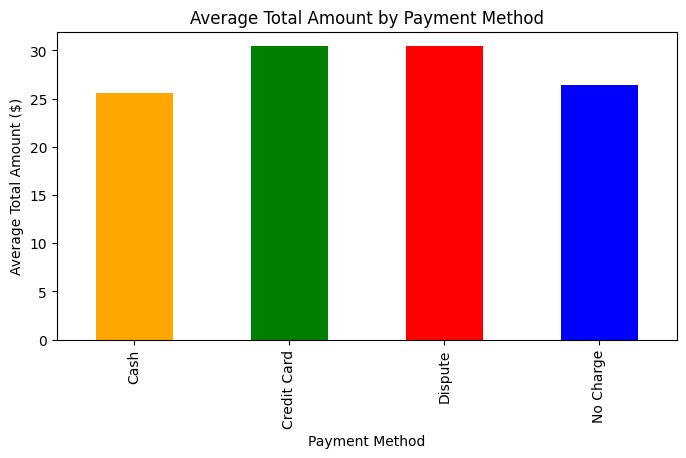

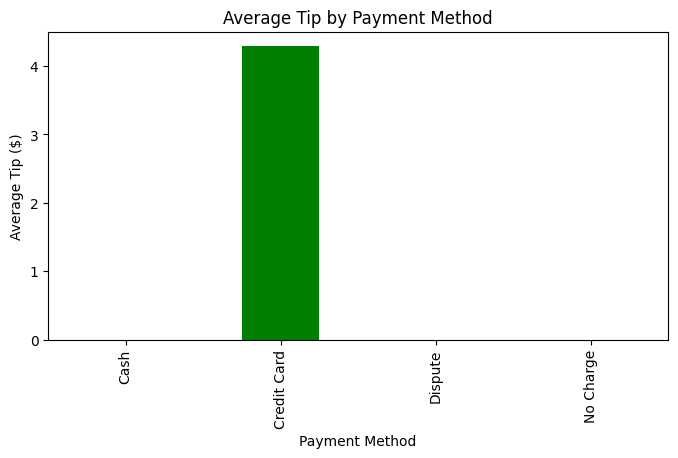

In [51]:
# Bar chart: average total amount by payment type
payment_behavior['avg_total_amount'].plot(kind='bar', figsize=(8,4), color=['orange','green','red','blue'])
plt.title("Average Total Amount by Payment Method")
plt.ylabel("Average Total Amount ($)")
plt.xlabel("Payment Method")
plt.show()

# Bar chart: average tip by payment type
payment_behavior['avg_tip'].plot(kind='bar', figsize=(8,4), color=['orange','green','red','blue'])
plt.title("Average Tip by Payment Method")
plt.ylabel("Average Tip ($)")
plt.xlabel("Payment Method")
plt.show()


In [1]:
import pandas as pd

# Replace with your actual path to the lookup CSV
lookup_df = pd.read_csv("taxi_zone_lookup.csv")

# Quick check
lookup_df.head()


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [ ]:
# Merge for pickup locations
import pandas as pd

# Replace with your actual file path
df = pd.read_parquet("yellow_tripdata_2025-11.parquet"

# Quick check
df.head()

df[['PULocationID','PU_Zone','DOLocationID','DO_Zone']].head()



FileNotFoundError: [Errno 2] No such file or directory: 'yellow_tripdata_2025-11.parquet'

In [8]:
filename="yellow_tripdata_2025-11.paraquet"
df = pd.read_parquet(filename)

# Quick check
print(df.head())
print(df.info())




   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         7  2025-11-01 00:13:25   2025-11-01 00:13:25              1.0   
1         2  2025-11-01 00:49:07   2025-11-01 01:01:22              1.0   
2         1  2025-11-01 00:07:19   2025-11-01 00:20:41              0.0   
3         2  2025-11-01 00:00:00   2025-11-01 01:01:03              3.0   
4         1  2025-11-01 00:18:50   2025-11-01 00:49:32              0.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.68         1.0                  N            43           186   
1           2.28         1.0                  N           142           237   
2           2.70         1.0                  N           163           238   
3          12.87         1.0                  N           138           261   
4           8.40         1.0                  N           138            37   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [9]:
# Merge for pickup locations
df = df.merge(lookup_df, left_on='PULocationID', right_on='LocationID', how='left')
df = df.rename(columns={'Borough':'PU_Borough', 'Zone':'PU_Zone'})
df.drop(columns='LocationID', inplace=True)

# Merge for dropoff locations
df = df.merge(lookup_df, left_on='DOLocationID', right_on='LocationID', how='left')
df = df.rename(columns={'Borough':'DO_Borough', 'Zone':'DO_Zone'})
df.drop(columns='LocationID', inplace=True)

# Check the merge
df[['PULocationID','PU_Zone','DOLocationID','DO_Zone']].head()


,PULocationID,PU_Zone,DOLocationID,DO_Zone
0,43,Central Park,186,Penn Station/Madison Sq West
1,142,Lincoln Square East,237,Upper East Side South
2,163,Midtown North,238,Upper West Side North
3,138,LaGuardia Airport,261,World Trade Center
4,138,LaGuardia Airport,37,Bushwick South


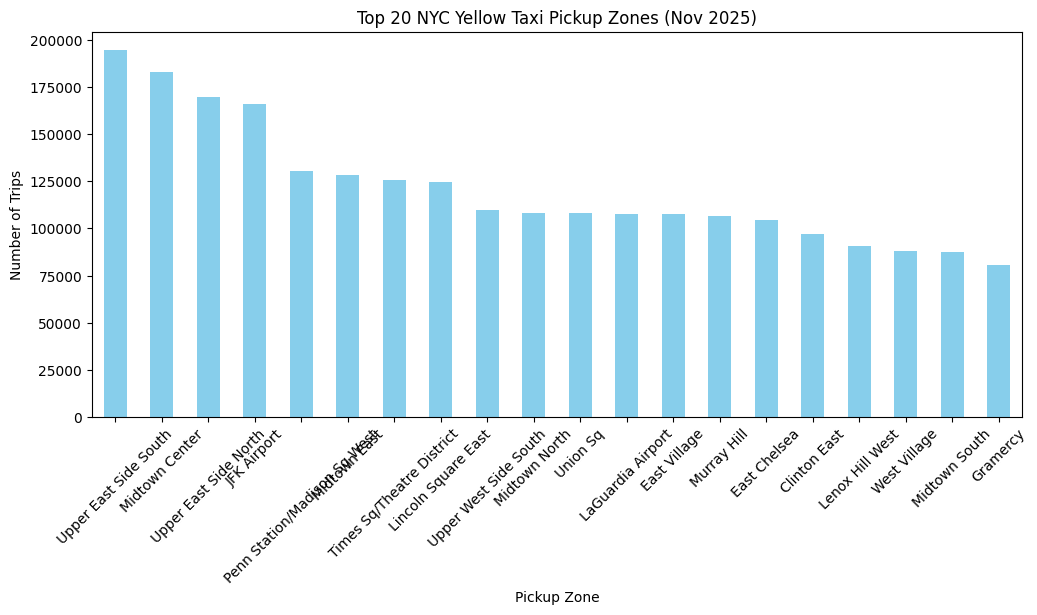

In [10]:
import matplotlib.pyplot as plt

# Count trips per pickup zone
pickup_counts = df['PU_Zone'].value_counts().head(20)  # top 20 zones

# Bar chart
plt.figure(figsize=(12,5))
pickup_counts.plot(kind='bar', color='skyblue')
plt.title("Top 20 NYC Yellow Taxi Pickup Zones (Nov 2025)")
plt.xlabel("Pickup Zone")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()


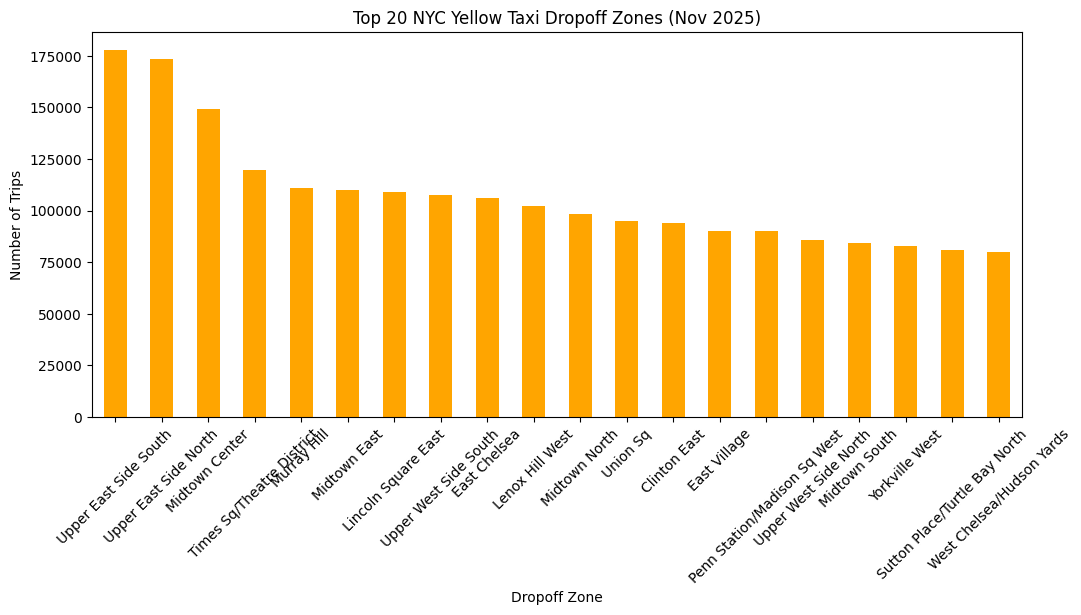

In [11]:
# Count trips per dropoff zone
dropoff_counts = df['DO_Zone'].value_counts().head(20)  # top 20 zones

# Bar chart
plt.figure(figsize=(12,5))
dropoff_counts.plot(kind='bar', color='orange')
plt.title("Top 20 NYC Yellow Taxi Dropoff Zones (Nov 2025)")
plt.xlabel("Dropoff Zone")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()
